In [96]:
from numpy.random import seed
seed(888)
import os
import numpy as np
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
tf.random.set_seed(404)
import os
import numpy as np
from keras.datasets import cifar10
import matplotlib.pyplot as plt
%matplotlib inline
from time import strftime
from keras.callbacks import TensorBoard

In [97]:
label_names = ['Plane','Car','Bird','Cat','Deer','Dog','Frog','Horse','Ship','Truck']
img_width = 32
img_height = 32
img_pixels = img_width * img_height
color_channels = 3
validation_size = 10000
log_dir = 'tensorboard_cifar_logs/'

# Getting the data

In [98]:
(x_train_all,y_train_all), (x_test,y_test) = cifar10.load_data()

In [99]:
print(type (cifar10))
print(type (x_train_all))

<class 'module'>
<class 'numpy.ndarray'>


# Explore the Data

In [100]:
# x_train_all[0]

In [101]:
pic = tf.keras.utils.img_to_array(x_train_all[7])

In [102]:
label_names[y_train_all[6][0]]

'Bird'

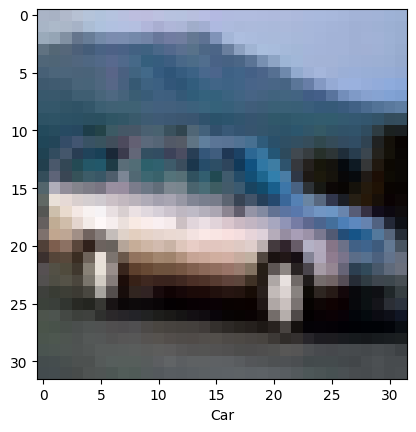

In [103]:
plt.imshow(x_train_all[4])
plt.xlabel(label_names[y_train_all[4][0]])
plt.show()

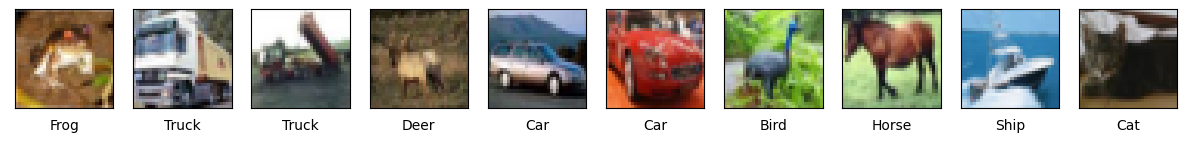

In [104]:
plt.figure(figsize=(15,5))
for i in range(10):
    plt.subplot(1,10,i+1)
    plt.yticks([])
    plt.xticks([])
    plt.xlabel(label_names[y_train_all[i][0]])
    plt.imshow(x_train_all[i])
plt.show()

In [105]:
no_images, x, y, c = x_train_all.shape
print("no of images {}, width {}, height {}, channels {}".format(no_images, x, y, c ))
# 3 channels mean - 3 color values

no of images 50000, width 32, height 32, channels 3


# Preprocess Data

In [106]:
type(x_train_all[0][0][0][0])
# it shows unsigned 8 bit integer
# if it was ' -10 ' then it would not be unsigned

numpy.uint8

In [107]:
x_train_all, x_test = x_train_all / 255.0, x_test/255.0

In [108]:
print(x_train_all[0][0][0][0])
print(len(x_train_all))
print(x_test[0][0][0][0])

0.23137254901960785
50000
0.6196078431372549


In [109]:
x_train_all = x_train_all.reshape(x_train_all.shape[0],img_pixels*color_channels)

In [110]:
x_train_all.shape

(50000, 3072)

In [111]:
x_test = x_test.reshape(x_test.shape[0], img_pixels*color_channels)

In [112]:
x_test.shape

(10000, 3072)

# Creating Validation Dataset

In [113]:
x_val = x_train_all[:validation_size]
y_val = y_train_all[:validation_size]
x_val.shape

(10000, 3072)

In [114]:
#x_train and y_train will have the *LAST* 40000 values from both x_train_alll and y_train_all
x_train = x_train_all[validation_size:]
y_train = y_train_all[validation_size:]
x_train.shape

(40000, 3072)

## Creating a sample illustration dataset

In [115]:
x_train_ill = x_train[:1000]
y_train_ill = y_train[:1000]

# The Neural Networks with keras

In [116]:
model_1 = Sequential([
    Dense(units = 128, input_dim=img_pixels*color_channels, activation='relu', name='m1_hidden1'),
    Dense(units=64, activation='relu', name='m1_hidden2'),
    Dense(units=16, activation='relu', name='m1_hidden3'),
    Dense(units=10,activation='softmax', name='m1_output')
])

model_1.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [117]:
type(model_1)

keras.engine.sequential.Sequential

In [118]:
model_1.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 m1_hidden1 (Dense)          (None, 128)               393344    
                                                                 
 m1_hidden2 (Dense)          (None, 64)                8256      
                                                                 
 m1_hidden3 (Dense)          (None, 16)                1040      
                                                                 
 m1_output (Dense)           (None, 10)                170       
                                                                 
Total params: 402,810
Trainable params: 402,810
Non-trainable params: 0
_________________________________________________________________


In [129]:
model_2 = Sequential()
model_2.add(Dropout(0.2, seed=42, input_shape= (img_pixels*color_channels,)))
model_2.add(Dense(128, activation='relu', name='m2_hidde1'))
model_2.add(Dense(64, activation='relu', name='m2_hidde2'))
model_2.add(Dense(16, activation='relu', name='m2_hidde3'))
model_2.add(Dense(10, activation='softmax', name='m2_output'))
model_2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Tensorboard (visual learning)

In [83]:
def get_tensorboard(model_name):
    folder_name = f'model_name at {strftime("%H %M")}'
    dir_paths = os.path.join(log_dir,folder_name)
    try: 
        os.makedirs(dir_paths)
        print(folder_name)
    except OSError as err:
        print(err.strerror)
    else:
        print('success')
    return TensorBoard(log_dir=dir_paths)

# Fitting the Model

In [84]:
samples_per_batch = 1000

In [85]:
%%time
no_epochs = 200
model_1.fit(x_train_all, y_train_all, batch_size=samples_per_batch, epochs=no_epochs, callbacks=[get_tensorboard('Model 1')], verbose=0, validation_data=(x_val, y_val))
#Verbose=0 hides the results, verbose= 1 in default..

model_name at 18 54
success
CPU times: total: 19min 55s
Wall time: 6min 1s


In [130]:
 %%time
no_epochs = 200
model_2.fit(x_train_all, y_train_all, batch_size=samples_per_batch, epochs=no_epochs, callbacks=[get_tensorboard('Model 2')], verbose=0, validation_data=(x_val, y_val))
#Verbose=0 hides the results, verbose= 1 in default..

model_name at 20 25
success
CPU times: total: 45min 58s
Wall time: 14min 8s
